In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델



# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier
# KNN 결측처리
from sklearn.impute import KNNImputer

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('/home/piai/바탕화면/빅분_백은정/빅데이터분석/Car.csv')
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [4]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
dtype: int64

In [5]:
# 연비 숫자와 단위 분리
df[['Mileage', 'Mileage_Unit']] = df['Mileage'].str.split(expand=True)
df[['Engine', 'Engine_Unit']] = df['Engine'].str.split(expand=True)
df[['Power', 'Power_Unit']] = df['Power'].str.split(expand=True)
df[['New_Price', 'New_Price_Unit']] = df['New_Price'].str.split(expand=True)

# 컬럼명에 단위 표기
df.rename(columns={"Mileage": "Mileage(km/l)", "Engine":"Engine(CC)", "Power":"Power(bhp)","New_Price":"New_Price(Lakh)"}, inplace=True)
# 단위 컬럼 제거
df.drop(['Engine_Unit', 'Mileage_Unit', 'Power_Unit', "New_Price_Unit"], axis=1, inplace=True)

# 숫자형 컬럼으로 변경
df['Engine(CC)'] = pd.to_numeric(df['Engine(CC)'], errors='coerce')
df['Mileage(km/l)'] = pd.to_numeric(df['Mileage(km/l)'], errors='coerce')
df['Power(bhp)'] = pd.to_numeric(df['Power(bhp)'], errors='coerce')
df['New_Price(Lakh)'] = pd.to_numeric(df['New_Price(Lakh)'], errors='coerce')

df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,New_Price(Lakh)
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN


In [6]:
# Mileage(km/l) 컬럼에 '0.0'값 발견
print(df['Mileage(km/l)'].value_counts())
# 'null'값이 갯수 확인
print(len(df[df['Mileage(km/l)'] == 0.0]))
# 문자 'null'을 np.nan으로 변경
df['Mileage(km/l)'].replace(0.0, np.nan, inplace=True)

17.00    208
18.90    201
18.60    144
21.10    107
20.36    105
        ... 
17.09      1
19.91      1
17.16      1
18.23      1
17.15      1
Name: Mileage(km/l), Length: 438, dtype: int64
81


## 결측치를 같은값으로 보간할 수 있는지 비교

In [7]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)          83
Engine(CC)             46
Power(bhp)            175
Seats                  53
New_Price(Lakh)      6247
dtype: int64

### Price

* 목표변수이므로 보간x

###  Mileage(km/l)

In [8]:
NPN = df[df['Mileage(km/l)'].isnull() == True]['Name']
NP = df[df['Mileage(km/l)'].isnull() == False]['Name']

In [9]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

3


In [10]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Engine(CC)'].isnull()].index
    npower = df.loc[np_idx, 'Engine(CC)'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Engine(CC)'] = npower

In [11]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)          83
Engine(CC)             43
Power(bhp)            175
Seats                  53
New_Price(Lakh)      6247
dtype: int64

* 83개의 결측값 중 3개 보간

### Engine(CC)

In [12]:
NPN = df[df['Engine(CC)'].isnull() == True]['Name']
NP = df[df['Engine(CC)'].isnull() == False]['Name']

In [13]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

3


In [14]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Engine(CC)'].isnull()].index
    npower = df.loc[np_idx, 'Engine(CC)'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Engine(CC)'] = npower

In [15]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)          83
Engine(CC)             40
Power(bhp)            175
Seats                  53
New_Price(Lakh)      6247
dtype: int64

* 46개의 결측값 중 6개 보간

### Power(bhp)

In [16]:
NPN = df[df['Power(bhp)'].isnull() == True]['Name']
NP = df[df['Power(bhp)'].isnull() == False]['Name']

In [17]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

39


In [18]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Power(bhp)'].isnull()].index
    npower = df.loc[np_idx, 'Power(bhp)'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Power(bhp)'] = npower

In [19]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)          83
Engine(CC)             40
Power(bhp)            136
Seats                  53
New_Price(Lakh)      6247
dtype: int64

* 175개의 결측값 중 39개 보간

### Seats

In [20]:
NPN = df[df['Seats'].isnull() == True]['Name']
NP = df[df['Seats'].isnull() == False]['Name']

In [21]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

7


In [22]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['Seats'].isnull()].index
    npower = df.loc[np_idx, 'Seats'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'Seats'] = npower

In [23]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)          83
Engine(CC)             40
Power(bhp)            136
Seats                  46
New_Price(Lakh)      6247
dtype: int64

* 53개의 결측값 중 7개 보간

### New_Price(Lakh)

In [24]:
NPN = df[df['New_Price(Lakh)'].isnull() == True]['Name']
NP = df[df['New_Price(Lakh)'].isnull() == False]['Name']

In [25]:
overlap_cars = NPN[NPN.isin(NP)]

# Mileage(km/l)가 모델명을 새로운 시리즈에 담기
new_series = pd.Series(overlap_cars)

# 결과 출력
print(len(new_series))

227


In [26]:
# 동일한 'Name'을 가진 행의 'Power(bhp)' 값을 복사하여 결측치가 있는 행에 넣습니다.
for car_name in overlap_cars:
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져옵니다.
    np_idx = df[(df['Name'] == car_name) & ~df['New_Price(Lakh)'].isnull()].index
    npower = df.loc[np_idx, 'New_Price(Lakh)'].values[0]
    
    # 결측치가 있는 행에서 해당 차량의 인덱스를 가져와 'Power(bhp)' 값을 대체합니다.
    df.loc[df['Name'] == car_name, 'New_Price(Lakh)'] = npower

In [27]:
# 결측치 확인
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)          83
Engine(CC)             40
Power(bhp)            136
Seats                  46
New_Price(Lakh)      6020
dtype: int64

* 6247개의 결측값 중 227개 보간

## 결측치 처리

In [28]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)          83
Engine(CC)             40
Power(bhp)            136
Seats                  46
New_Price(Lakh)      6020
dtype: int64

In [29]:
# Data shape 확인
df.shape

(7253, 13)

In [30]:
print(f'New_Price(Lakh)컬럼의 결측치 비율 : {6020/7253*100}%')

New_Price(Lakh)컬럼의 결측치 비율 : 83.00013787398318%


In [31]:
# 'New_Price(Lakh)'행 제외
df = df.drop('New_Price(Lakh)', axis=1)

* 결측값이 0.83이므로 대체하기보다는 열 자체를 제외하기로 판단.

In [32]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)          83
Engine(CC)             40
Power(bhp)            136
Seats                  46
dtype: int64

In [33]:
df.corr()

,Price,Year,Kilometers_Driven,Mileage(km/l),Engine(CC),Power(bhp),Seats
Price,1.000000,0.303140,-0.014603,-0.325996,0.640075,0.754943,0.052851
Year,0.303140,1.000000,-0.187859,0.301037,-0.054194,0.015409,0.008798
Kilometers_Driven,-0.014603,-0.187859,1.000000,-0.069449,0.094778,0.029445,0.090160
Mileage(km/l),-0.325996,0.301037,-0.069449,1.000000,-0.645327,-0.550951,-0.348028
Engine(CC),0.640075,-0.054194,0.094778,-0.645327,1.000000,0.859473,0.399333
Power(bhp),0.754943,0.015409,0.029445,-0.550951,0.859473,1.000000,0.096774
Seats,0.052851,0.008798,0.090160,-0.348028,0.399333,0.096774,1.000000


In [34]:
# KNN 보간을 위해 필요한 열 선택
columns_to_interpolate = ['Mileage(km/l)', 'Engine(CC)', 'Power(bhp)', 'Seats']
KKK = []
# 표준화를 위해 StandardScaler 사용
scaler = StandardScaler()
df[columns_to_interpolate] = scaler.fit_transform(df[columns_to_interpolate])

# KNN 보간 수행
imputer = KNNImputer(n_neighbors=5)
df[columns_to_interpolate] = imputer.fit_transform(df[columns_to_interpolate])

# 보간된 데이터를 표준화된 스케일에서 원래 스케일로 변환
df[columns_to_interpolate] = scaler.inverse_transform(df[columns_to_interpolate])

* 'Mileage(km/l)','Engine(CC)','Power(bhp)','Seats'컬럼들간의 상관성 확인 후 KNN평균값으로 결측치 대체

In [35]:
df.isnull().sum()

Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(km/l)           0
Engine(CC)              0
Power(bhp)              0
Seats                   0
dtype: int64

In [36]:
# Price(목표변수) 결측 행 제거
df.dropna(inplace=True)

In [37]:
# 인덱스 초기화
df.reset_index(drop=True, inplace=True)
df.shape

(6200, 12)

## 파생변수 생성

In [38]:
# 브랜드명 컬럼 생성
df['Brand'] = df['Name'].str.split().str[0]
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi


In [39]:
# 브랜드별 국적 라벨링
nationality_mapping = {
    'Maruti': '인도',
    'Hyundai': '한국',
    'Honda': '일본',
    'Toyota': '일본',
    'Mercedes-Benz': '독일',
    'Volkswagen': '독일',
    'Ford': '미국',
    'Mahindra': '인도',
    'BMW': '독일',
    'Audi': '독일',
    'Tata': '인도',
    'Skoda': '체코',
    'Renault': '프랑스',
    'Chevrolet': '미국',
    'Nissan': '일본',
    'Land': '영국',
    'Jaguar': '영국',
    'Fiat': '이탈리아',
    'Mitsubishi': '일본',
    'Mini': '영국',
    'Volvo': '스웨덴',
    'Porsche': '독일',
    'Jeep': '미국',
    'Datsun': '일본',
    'ISUZU': '일본',
    'Force': '인도',
    'Bentley': '영국',
    'Smart': '독일',
    'Ambassador': '인도',
    'Lamborghini': '이탈리아',
    'Hindustan': '인도',
    'OpelCorsa': '독일'
}

In [40]:
df['Nationality'] = df['Brand'].map(nationality_mapping)

In [41]:
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand,Nationality
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,인도
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,한국
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,일본
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,인도
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,독일


Owner_Type 변수 수치화

In [42]:
df['Owner_Type']=df['Owner_Type'].replace('First', 1)
df['Owner_Type']=df['Owner_Type'].replace('Second', 2)
df['Owner_Type']=df['Owner_Type'].replace('Third', 3)
df['Owner_Type']=df['Owner_Type'].replace('Fourth & Above', 4)
df.head()

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand,Nationality
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,Maruti,인도
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,Hyundai,한국
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,Honda,일본
3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,Maruti,인도
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,Audi,독일


#### Boxplot을 활용한 이상치 확인

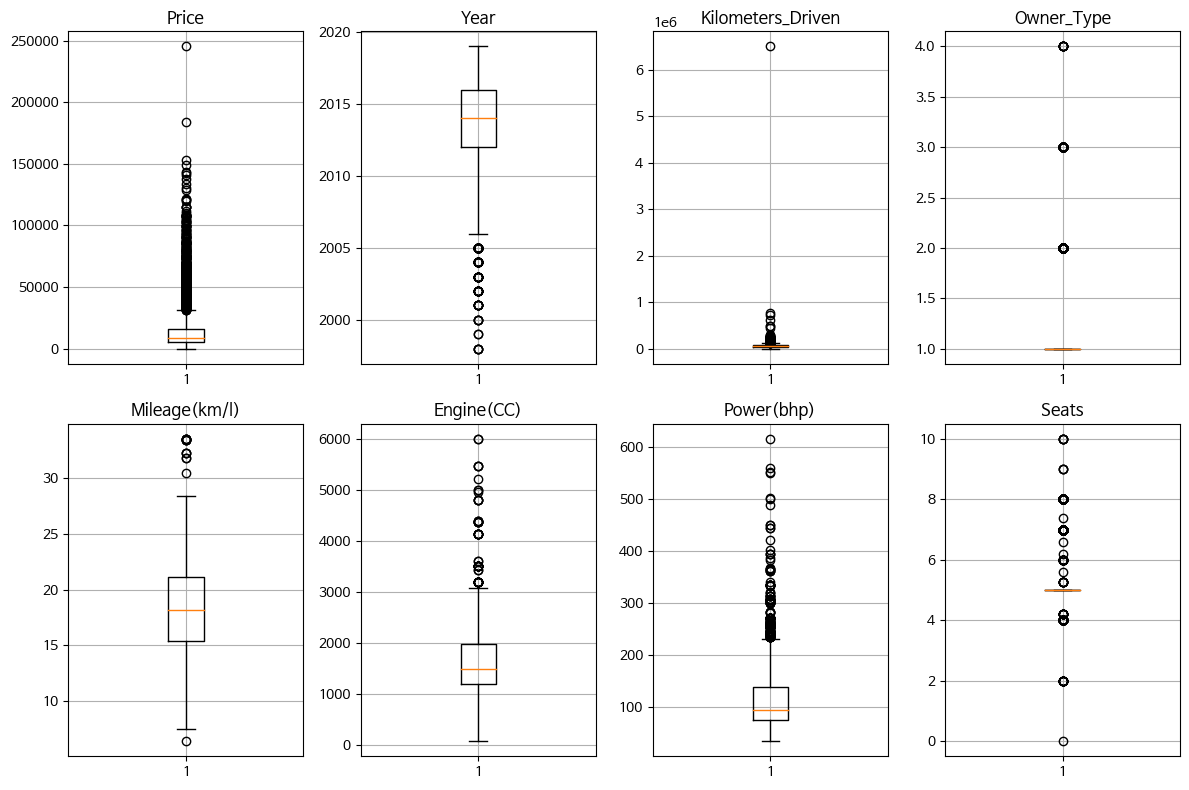

In [43]:
# 박스플롯 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.boxplot(df[col], whis=1.5)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

* 자동차는 브랜드별 가종별로 그 편차가 크기 때문에 1.5IQR수염으로는 이상치를 판단하기 어려움

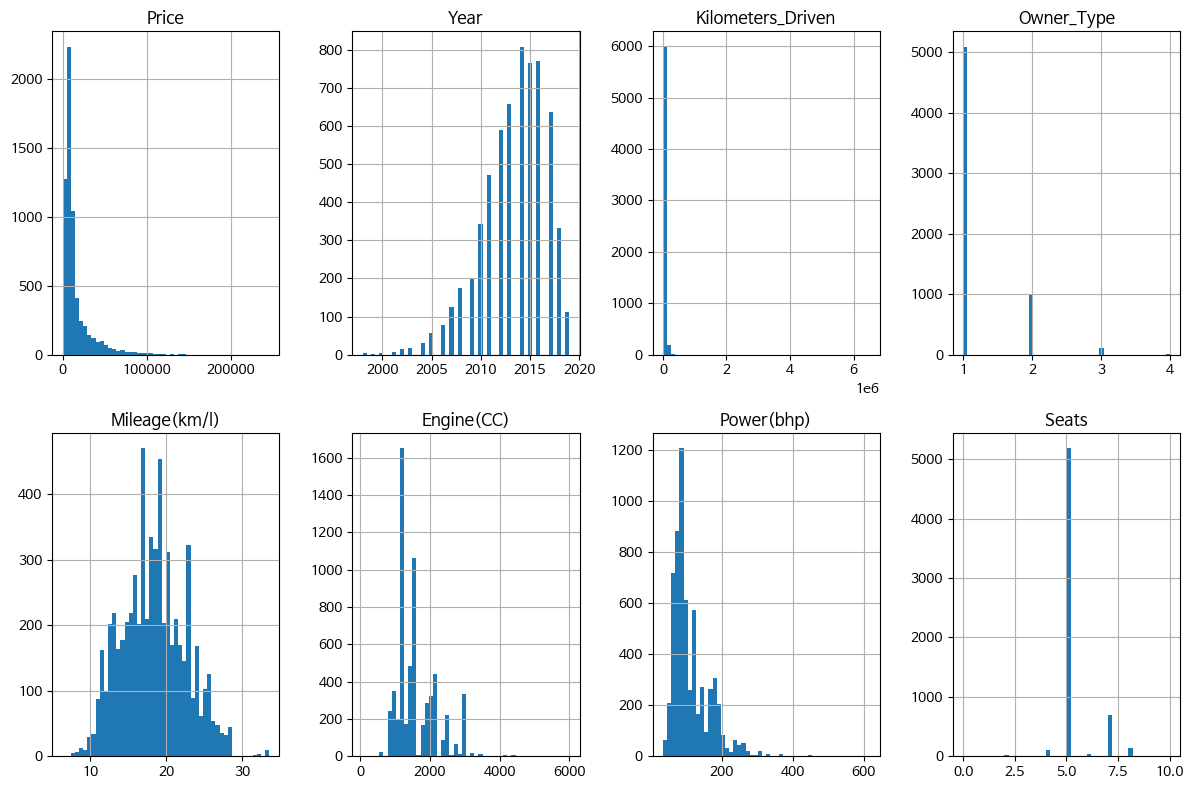

In [44]:
# 히스토그램 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 히스토그램 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.hist(df[col], bins=50)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

In [45]:
df[df['Price']>150000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand,Nationality
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,245273.6,2017,25000,Diesel,Automatic,1,13.33,2993.0,255.0,5.0,Land,영국
5781,Lamborghini Gallardo Coupe,Delhi,183955.2,2011,6500,Petrol,Automatic,3,6.40,5204.0,560.0,2.0,Lamborghini,이탈리아
5919,Jaguar F Type 5.0 V8 S,Hyderabad,153296.0,2015,8000,Petrol,Automatic,1,12.50,5000.0,488.1,2.0,Jaguar,영국


* 1.5억 이상의 기종 확인 결과 이상치가 아니라고 판단

In [46]:
df[df['Year']<2005]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand,Nationality
222,Maruti Wagon R LXI,Chennai,1916.20,2004,61000,Petrol,Manual,2,18.90,998.0,67.100,5.0,Maruti,인도
274,Maruti Zen VXI BSII,Mumbai,843.13,2002,60000,Petrol,Manual,3,17.30,993.0,60.000,5.0,Maruti,인도
315,Tata Sumo Delux,Hyderabad,2299.44,2000,158000,Diesel,Manual,2,14.07,2956.0,83.100,7.0,Tata,인도
336,Toyota Corolla H4,Chennai,3832.40,2004,105000,Petrol,Automatic,2,11.30,1794.0,125.000,5.0,Toyota,일본
364,Maruti Zen LX,Kolkata,996.42,2003,65000,Petrol,Manual,1,17.30,993.0,60.000,5.0,Maruti,인도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,Maruti Wagon R LX,Pune,1532.96,2004,94000,Petrol,Manual,2,18.90,998.0,67.100,5.0,Maruti,인도
5914,Skoda Octavia Elegance 1.9 TDI,Hyderabad,3449.16,2003,132000,Diesel,Manual,1,18.70,1896.0,66.000,5.0,Skoda,체코
5926,Maruti 800 DX BSII,Pune,843.13,2000,78000,Petrol,Manual,1,16.10,796.0,37.000,4.0,Maruti,인도
5943,Mahindra Jeep MM 540 DP,Chennai,2606.03,2002,75000,Diesel,Manual,1,14.72,2112.0,147.336,6.0,Mahindra,인도


* 2005년식 이하의 기종 확인 결과 이상치가 아니라고 판단

In [47]:
df[df['Kilometers_Driven']>1000000]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand,Nationality
2328,BMW X5 xDrive 30d M Sport,Chennai,99642.4,2017,6500000,Diesel,Automatic,1,15.97,2993.0,258.0,5.0,BMW,독일


In [48]:
df = df.drop(df[df['Kilometers_Driven']>1000000].index, axis=0).reset_index()

* 주행거리가 100만킬로미터 이상인 항목 확인결과 이상치로 판단하여 제거

In [49]:
df[df['Seats']<2]

,index,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand,Nationality
3998,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,27593.28,2012,125000,Petrol,Automatic,1,10.5,3197.0,302.3,0.0,Audi,독일


In [50]:
df = df.drop(df[df['Seats']<2].index, axis=0).reset_index()

* 좌석 수 0으로 표기된 항목 제거

#### 이상치 제거 완료

## EDA

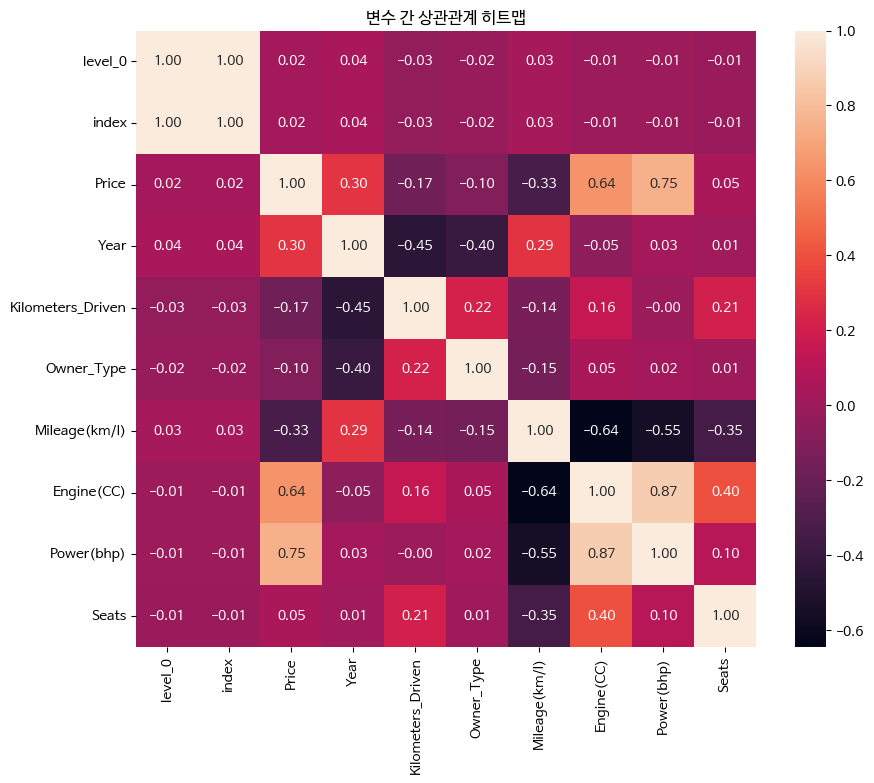

In [51]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))  # 그림 크기 설정
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("변수 간 상관관계 히트맵")  # 그래프 제목
plt.show()

* 엔진CC와 연비 음의 상관관계(-0.64)
* 마력과 연비 음의 상관관계(-0.55)
* 가격과 마력 양의 상관관계(0.75)
* 가격과 엔진CC 양의 상관관계(0.64)
* 엔진CC와 마력 양의 상관관계(0.87)

In [76]:
df.to_csv("/home/piai/바탕화면/중고차.csv", encoding = "euc-kr")

<Axes: title={'center': 'Price'}, xlabel='Fuel_Type'>

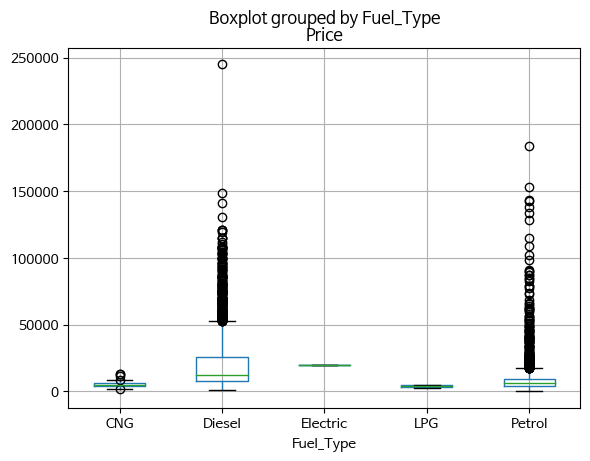

In [53]:
# H0: 연료유형 별로 중고차 가격에 차이가 없다.
# H1: 연료유형 중 적어도 하나의 연료유형은 중고차 가격에 차이가 있다.
# anova 검정

df_1 = pd.DataFrame(df)
df_1.boxplot(column = 'Price', by = 'Fuel_Type')

In [62]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

Diesel_data = df[df['Fuel_Type'] == 'Diesel']['Price']

statistic, p = stats.shapiro(Diesel_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.7403157949447632, p-value=0.0


In [63]:
Petrol_data = df[df['Fuel_Type'] == 'Petrol']['Price']

statistic, p = stats.shapiro(Petrol_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.4448670744895935, p-value=0.0


In [67]:
CNG_data = df[df['Fuel_Type'] == 'CNG']['Price']

statistic, p = stats.shapiro(CNG_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.8620015382766724, p-value=1.105625051422976e-05


In [68]:
LPG_data = df[df['Fuel_Type'] == 'LPG']['Price']

statistic, p = stats.shapiro(LPG_data)
print("statistic={}, p-value={}".format(statistic, p))

statistic=0.9055684804916382, p-value=0.2519165873527527


In [66]:
# Electric_data = df[df['Fuel_Type'] == 'Electric']['Price']

# statistic, p = stats.shapiro(Electric_data)
# print("statistic={}, p-value={}".format(statistic, p))

In [101]:
grouped_data = df.groupby('Fuel_Type')['Price'].apply(list)
statistic, p = stats.bartlett(*grouped_data)

print("statistic={}, p-value={}".format(statistic, p))

statistic=904.0736255523367, p-value=2.182931397457489e-194


In [107]:
# ANOVA 실행
grouped_data = df.groupby('Fuel_Type')['Price'].apply(list)
f_result = stats.f_oneway(*grouped_data)

# ANOVA의 f값, p값 저장
f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

# ANOVA의 f값, p값 출력
print("One-way ANOVA")
print("F 통계량:{}".format(f))
print("p-value:{}".format(p))

One-way ANOVA
F 통계량:172.738
p-value:0.0


In [72]:
df.head()

,level_0,index,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand,Nationality
0,0,0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,Maruti,인도
1,1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,Hyundai,한국
2,2,2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,Honda,일본
3,3,3,Maruti Ertiga VDI,Chennai,9197.76,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,Maruti,인도
4,4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,27194.71,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,Audi,독일


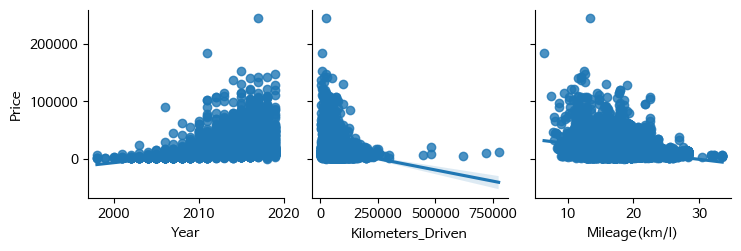

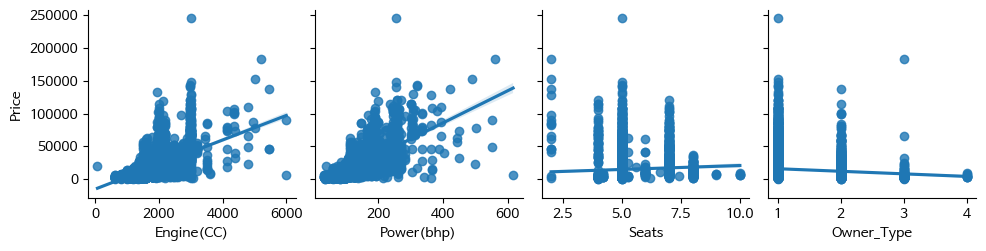

In [109]:
sns.pairplot(df, y_vars = "Price", x_vars = ["Year", "Kilometers_Driven", "Mileage(km/l)"], kind = 'reg')
sns.pairplot(df, y_vars = "Price", x_vars = ["Engine(CC)", "Power(bhp)", "Seats", "Owner_Type"], kind = 'reg')

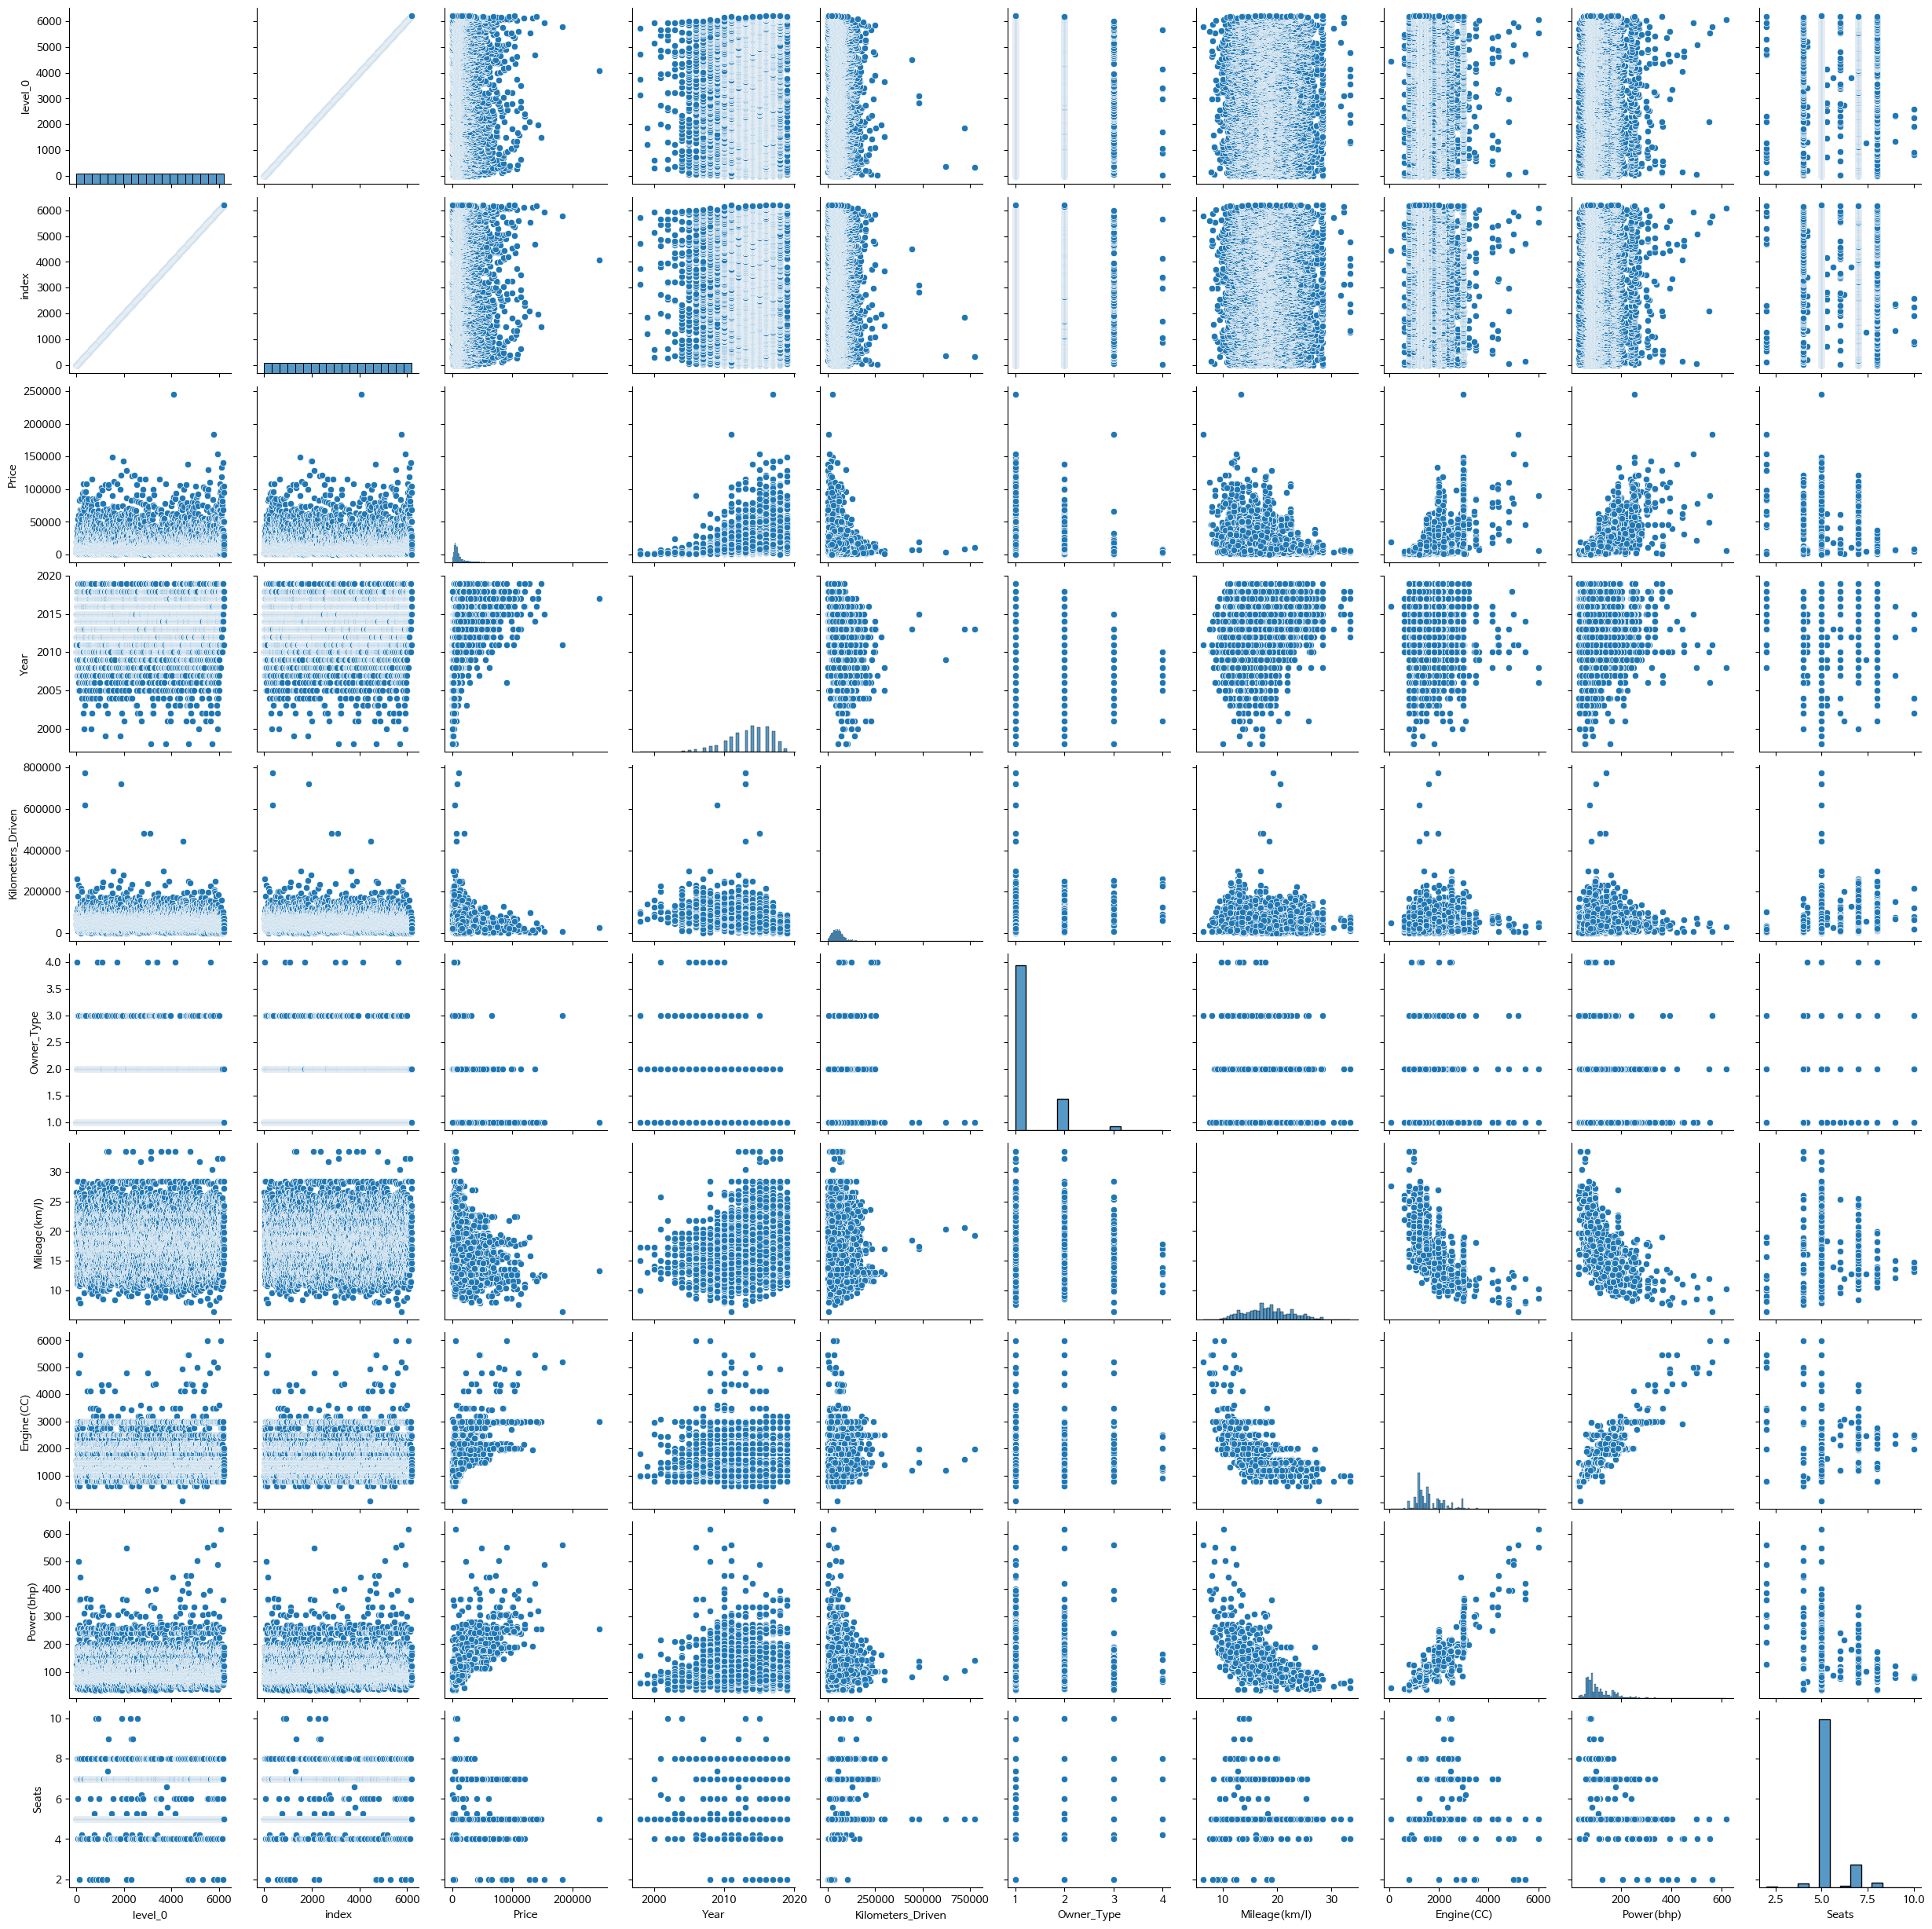

In [111]:
# 설명변수 간의 선형관계 확인
sns.pairplot(df)

In [112]:
df.corr().round(3)

,level_0,index,Price,Year,Kilometers_Driven,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats
level_0,1.000,1.000,0.018,0.041,-0.034,-0.017,0.034,-0.007,-0.008,-0.010
index,1.000,1.000,0.018,0.041,-0.034,-0.017,0.034,-0.007,-0.008,-0.010
Price,0.018,0.018,1.000,0.303,-0.167,-0.100,-0.327,0.639,0.754,0.055
Year,0.041,0.041,0.303,1.000,-0.455,-0.398,0.294,-0.054,0.027,0.013
Kilometers_Driven,-0.034,-0.034,-0.167,-0.455,1.000,0.220,-0.142,0.156,-0.002,0.213
Owner_Type,-0.017,-0.017,-0.100,-0.398,0.220,1.000,-0.151,0.050,0.018,0.010
Mileage(km/l),0.034,0.034,-0.327,0.294,-0.142,-0.151,1.000,-0.644,-0.548,-0.346
Engine(CC),-0.007,-0.007,0.639,-0.054,0.156,0.050,-0.644,1.000,0.865,0.400
Power(bhp),-0.008,-0.008,0.754,0.027,-0.002,0.018,-0.548,0.865,1.000,0.098
Seats,-0.010,-0.010,0.055,0.013,0.213,0.010,-0.346,0.400,0.098,1.000


In [113]:
# train/test data 분리
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (4338, 16)
test data size: (1860, 16)


In [119]:
reg_model = smf.ols(formula = "Price ~ Year + Kilometers_Driven + Mileage_km_l + Engine_CC + Power_bhp + Seats", data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

PatsyError: Error evaluating factor: NameError: name 'Power_bhp' is not defined
    Price ~ Year + Kilometers_Driven + Mileage_km_l + Engine_CC + Power_bhp + Seats
                                                                  ^^^^^^^^^

In [ ]:
Diesel_data = df[df['Fuel_Type'] == 'Diesel']['Price']

statistic, p = stats.shapiro(Diesel_data)
print("statistic={}, p-value={}".format(statistic, p))

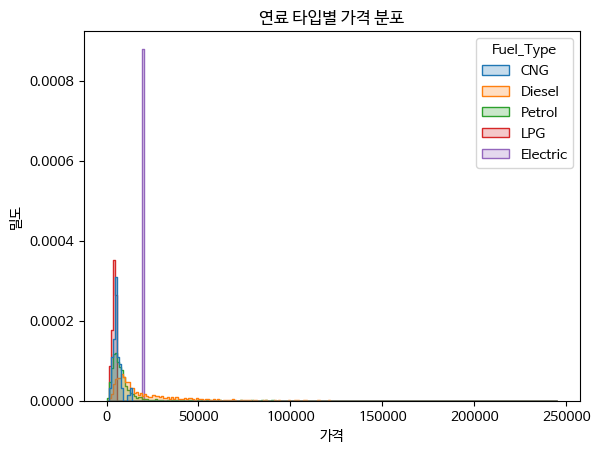

In [74]:
sns.histplot(data=df, x='Price', hue='Fuel_Type', element='step', stat='density', common_norm=False)
plt.title('연료 타입별 가격 분포')
plt.xlabel('가격')
plt.ylabel('밀도')
plt.show()

In [ ]:
# 국가별 중고차 가격

# 구동방식별 중고차 가격

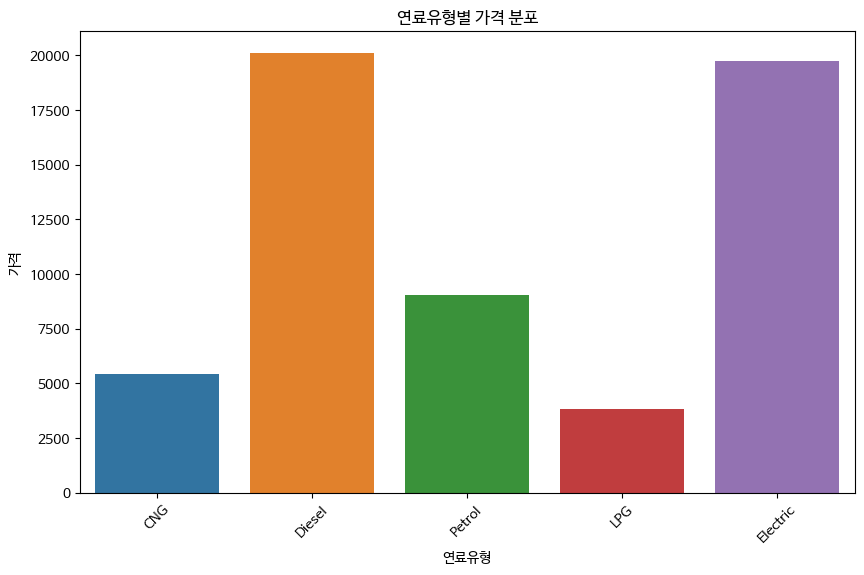

In [124]:
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='Fuel_Type', y='Price', data=df, ci=None)  # ci=None으로 신뢰구간을 표시하지 않습니다.

plt.title('연료유형별 가격 분포')  # 그래프의 제목을 설정합니다.
plt.xlabel('연료유형')  # x축 라벨을 설정합니다.
plt.ylabel('가격')  # y축 라벨을 설정합니다.
plt.xticks(rotation=45)  # x축 라벨을 회전시켜 겹침을 방지합니다.
plt.show()

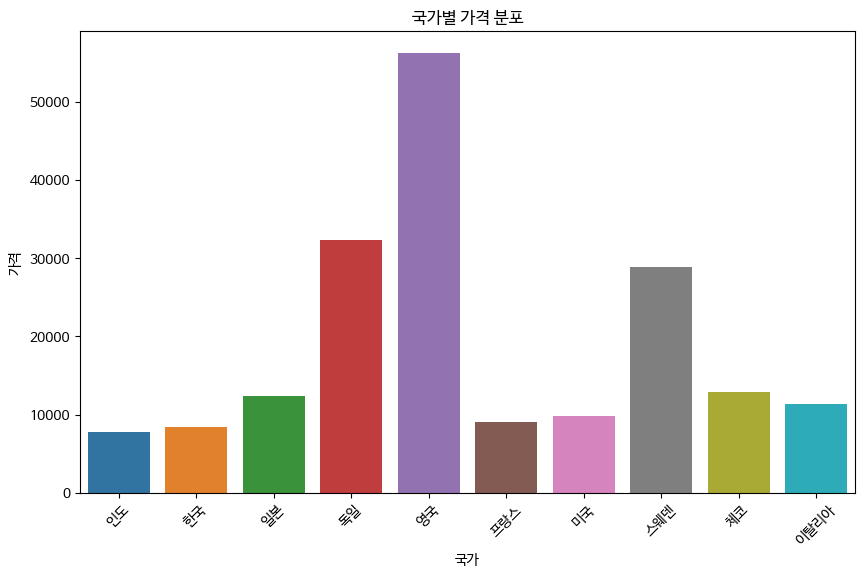

In [91]:
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='Nationality', y='Price', data=df, ci=None)  # ci=None으로 신뢰구간을 표시하지 않습니다.

plt.title('국가별 가격 분포')  # 그래프의 제목을 설정합니다.
plt.xlabel('국가')  # x축 라벨을 설정합니다.
plt.ylabel('가격')  # y축 라벨을 설정합니다.
plt.xticks(rotation=45)  # x축 라벨을 회전시켜 겹침을 방지합니다.
plt.show()

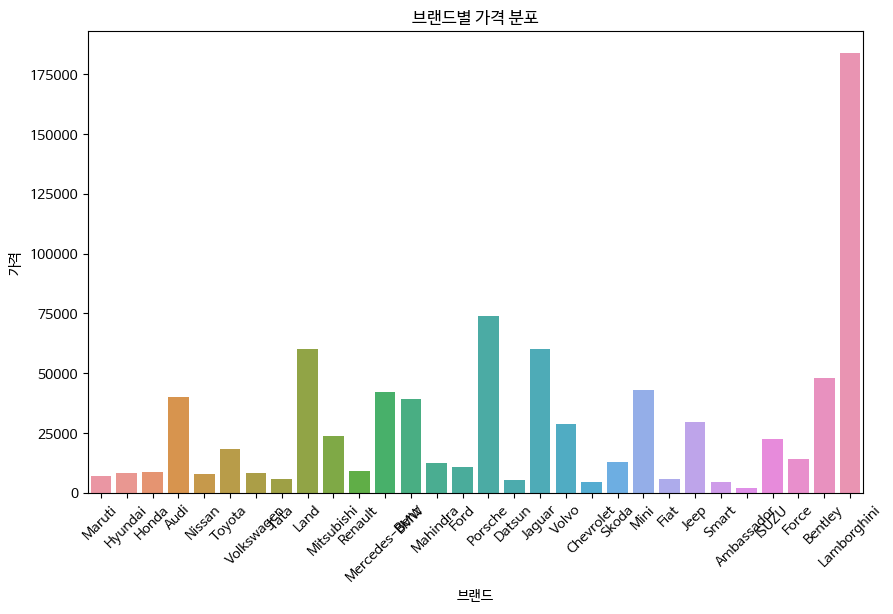

In [92]:
plt.figure(figsize=(10, 6))  # 그래프의 크기를 설정합니다.
sns.barplot(x='Brand', y='Price', data=df, ci=None)  # ci=None으로 신뢰구간을 표시하지 않습니다.

plt.title('브랜드별 가격 분포')  # 그래프의 제목을 설정합니다.
plt.xlabel('브랜드')  # x축 라벨을 설정합니다.
plt.ylabel('가격')  # y축 라벨을 설정합니다.
plt.xticks(rotation=45)  # x축 라벨을 회전시켜 겹침을 방지합니다.
plt.show()

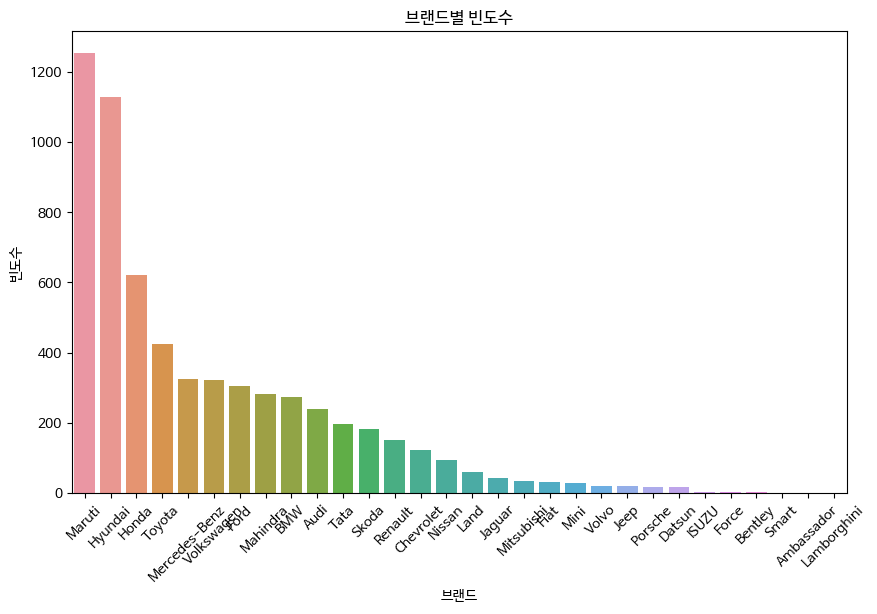

In [123]:
# 브랜드별 중고차 수

Brand_counts = df['Brand'].value_counts()

# 빈도수를 나타내는 바 차트를 그립니다.
plt.figur수e(figsize=(10, 6))
sns.barplot(x=Brand_counts.index, y=Brand_counts.values)
plt.title('브랜드별 빈도수')
plt.xlabel('브랜드')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # 브랜드명이 긴 경우 겹치지 않도록 회전
plt.show()

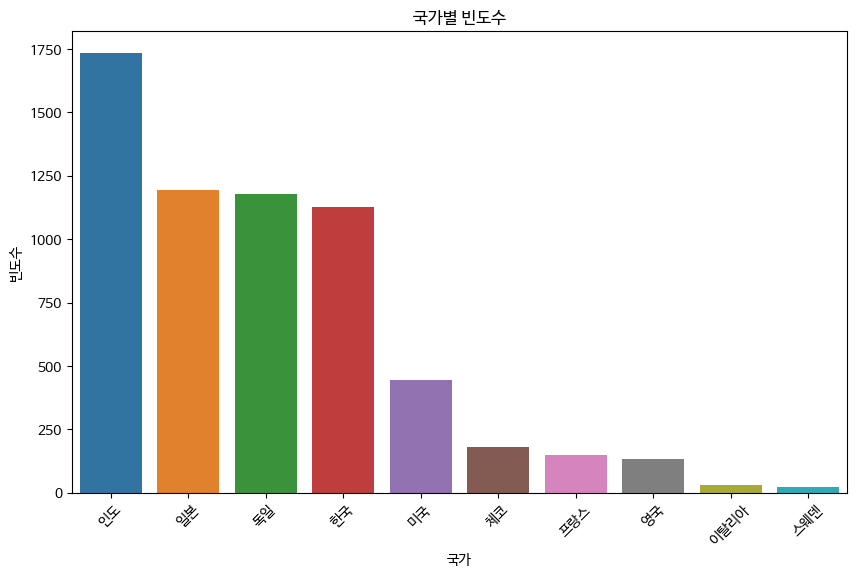

In [122]:
# 국가별 중고차 수

Nationality_counts = df['Nationality'].value_counts()

# 빈도수를 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x=Nationality_counts.index, y=Nationality_counts.values)
plt.title('국가별 빈도수')
plt.xlabel('국가')
plt.ylabel('빈도수')
plt.xticks(rotation=45)  # 국가명이 긴 경우 겹치지 않도록 회전
plt.show()

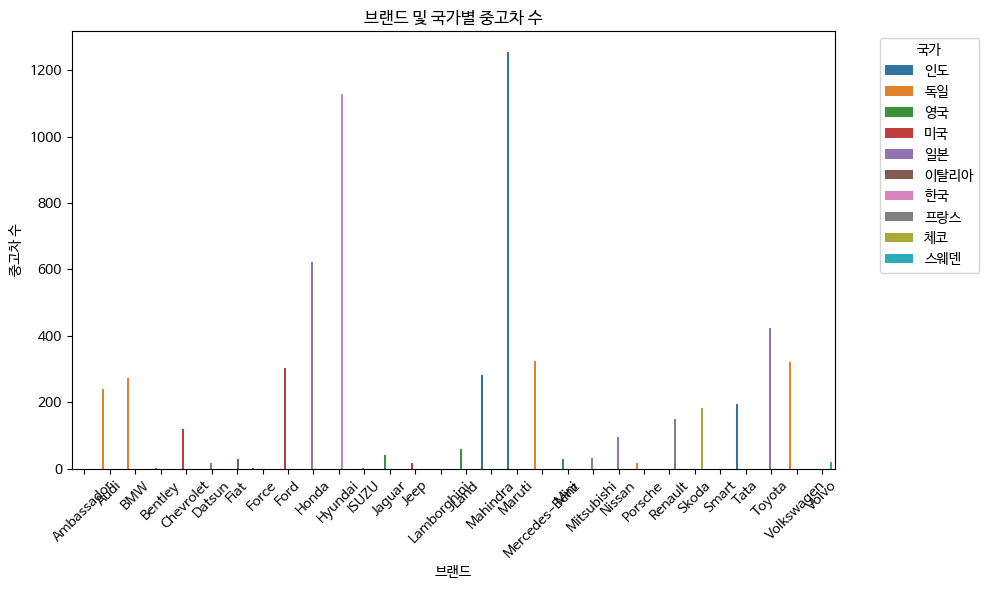

In [125]:
brand_nationality_counts = df.groupby(['Brand', 'Nationality']).size().reset_index(name='Counts')

# 빈도수를 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Counts', hue='Nationality', data=brand_nationality_counts)
plt.title('브랜드 및 국가별 중고차 수')
plt.xlabel('브랜드')
plt.ylabel('중고차 수')
plt.xticks(rotation=45)  # 브랜드명이 긴 경우 겹치지 않도록 회전
plt.legend(title='국가', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 차트 밖에 배치
plt.tight_layout()  # 그래프의 레이아웃을 조정
plt.show()

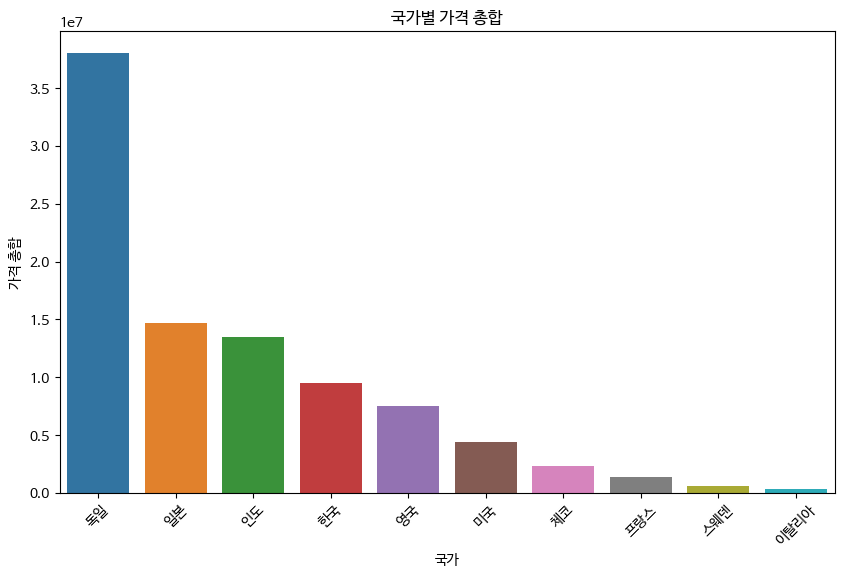

In [126]:
Nationality_price_sum = df.groupby('Nationality')['Price'].sum().sort_values(ascending=False).reset_index()

# 총합을 나타내는 바 차트를 그립니다.
plt.figure(figsize=(10, 6))
sns.barplot(x='Nationality', y='Price', data=Nationality_price_sum)
plt.title('국가별 가격 총합')
plt.xlabel('국가')
plt.ylabel('가격 총합')
plt.xticks(rotation=45)  # 국가명이 긴 경우 겹치지 않도록 회전
plt.show()

수입적으로 봤을 때 비싸더라도 독일차를 판매하는 것이 중고차 판매회사에게 이익을 가져다 줄 수 있을것이라 판단

점유율은 인도와 일본이 독일보다 높지만 가격 총합의 측면으로 보았을 때

In [ ]:
x = df.drop(['Price'])

In [ ]:
# 가성비 좋은 차를 선호하는가
# -> 고급차를 선호
# 독일차를 팔면 중고차 시장에서 살아남을것



단순선형회귀분석

H0: ~는 중고차 가격에 영향을 미치지 않는다.

H1: ~는 중고차 가격에 영향을 미친다.


다중선형회귀분석

H0: 모든 독립변수들은 중고차 가격에 영향을 미치지않는다.

H1: 적어도 하나의 독립변수가 중고차 가격에 영향을 미친다.


분산분석

H0: 모든 독립변수들은 중고차 가격에 영향을 미치지 않는다.

H1: 모든 독립변수들 중 적어도 하나는 중고차 가격에 영향을 미친다.


상관분석

H0: 변수간의 상관관계가 없다

H1: 변수간의 상관관계가 있다.




적절한 변수를 선택하고, 최종 모델을 구축하여 중고차 가격을 예측하기..

In [ ]:
위치

In [134]:
df.head(0)

,level_0,index,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km/l),Engine(CC),Power(bhp),Seats,Brand,Nationality
